### AIML: Semi Supervised Learning - Label propagation and Spreading (20th April 2022, Wednesday)

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

Shape of the dataset and targret

In [2]:
print(f"{digits.data.shape=}")
digits.target

digits.data.shape=(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

7


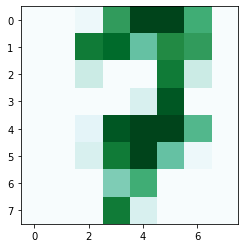

In [3]:
import matplotlib.pyplot as plt
import numpy as np

image_data = digits.data[300]
print(digits.target[300])
image = np.reshape(image_data, (8, 8))
plt.imshow(image, cmap="BuGn")  # <- cmap = colormap

Splitting the dataSet

In [4]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(
    digits.data, digits.target, test_size=.2,
)


In [5]:
x_train.shape, x_test.shape

((1437, 64), (360, 64))

Target Value

In [6]:
print(y_train)

[5 2 7 ... 0 3 9]


Taking first 300 values as Labled

In [7]:
x_labled, y_labled = x_train[:300], y_train[:300]

Remove the labels for non labled indices in training dataset  
Setting Labels of rest 300 data as -1


In [8]:
# y_train consists of 1436 Labels
y_train_unlabled = np.copy(y_train)
y_train_unlabled[300:] = -1


Import the model from skLearn to predict the labels of unlabled dataset

In [9]:
from sklearn.semi_supervised import LabelPropagation

model = LabelPropagation(gamma=.7)    # Initializing the model
model.fit(x_train, y_train_unlabled)  # training the model with unlabled data
model.score(x_test, y_test)           # getting prediction on test data


0.9777777777777777

Check the labels assigned by the model 

In [17]:
# Capture labels set by Label Propagation on the set of non labled data
y_labled_predicted = model.transduction_[300:]


In [29]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(
    y_train[300:],          # Actual labels of Unlabled data values
    y_labled_predicted,               # Model Predicted labels of data values
    labels=model.classes_
)
print(matrix)

[[122   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   2   0   0   0   1   0]
 [  0   1 111   0   0   0   0   0   0   0]
 [  0   0   0 122   0   0   0   0   0   1]
 [  0   1   0   0 113   0   0   0   0   3]
 [  0   0   0   0   0 115   1   0   0   1]
 [  1   1   0   0   0   3 104   0   0   0]
 [  0   0   0   0   0   0   0 109   0   1]
 [  0  11   2   0   0   1   2   1  97   1]
 [  0   0   0   2   0   3   0   0   1 101]]


In [34]:
from sklearn.semi_supervised import LabelSpreading

model2 = LabelSpreading(gamma=.3)
model2.fit(x_train, y_train_unlabled)
model2.score(x_test, y_test)


0.9861111111111112

In [38]:
y_labled_predicted2 = model2.transduction_[300:]
print(y_labled_predicted2)

[0 0 1 ... 0 3 9]


In [39]:
matrix2 = confusion_matrix(
    y_train[300:],
    y_labled_predicted2,
    labels=model2.classes_
)
print(matrix2)

[[122   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  0   0 112   0   0   0   0   0   0   0]
 [  0   0   0 123   0   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   3]
 [  0   0   0   0   0 116   0   0   0   1]
 [  0   1   0   0   0   4 104   0   0   0]
 [  0   0   0   0   0   0   0 109   0   1]
 [  0   4   0   0   0   0   2   0 109   0]
 [  0   0   0   2   0   3   0   0   1 101]]
